**Load And Preprocess The Data**

In [105]:
%cd /content/drive/MyDrive/data
!ls

/content/drive/MyDrive/data
clickposts_data.csv  final_df.csv  reorders_data.csv


In [106]:
import pandas as pd

#read data
clickpost = pd.read_csv("clickposts_data.csv")
reorders = pd.read_csv("reorders_data.csv")
#drop null column
clickpost = clickpost.drop(columns=['Unnamed: 0']).reset_index()
reorders = reorders.drop(columns=['Unnamed: 0']).reset_index()


print(clickpost.shape)
print(reorders.shape)

(743125, 4)
(10909, 6)


In [107]:
import numpy as np

np.unique(reorders['tag'])

array(['reorder', 'urgent-reorder'], dtype=object)

In [108]:
clickpost.columns

Index(['index', 'post_id', 'click_time', 'click_post_count'], dtype='object')

In [109]:
clickpost.head(5)

,index,post_id,click_time,click_post_count
0,0,gXvC9ucx,5/7/2020 0:00,31
1,1,gXluVlHC,5/7/2020 0:00,19
2,2,gXxugqam,5/7/2020 0:00,13
3,3,gXy6Jn2Y,5/7/2020 0:00,14
4,4,gXo2A5D9,5/7/2020 0:00,38


In [110]:
reorders.columns

Index(['index', 'post_id', 'tag', 'reorder_time', 'post_publish_time',
       'post_retire_time'],
      dtype='object')

In [111]:
reorders.head(5)

,index,post_id,tag,reorder_time,post_publish_time,post_retire_time
0,0,gX1-5MmB,reorder,5/9/2020 10:00,5/8/2020 22:44,5/11/2020 14:12
1,1,gX1-WPeh,urgent-reorder,5/9/2020 20:39,5/8/2020 19:14,5/13/2020 19:07
2,2,gX1eSoEn,reorder,5/9/2020 12:48,5/8/2020 14:14,5/9/2020 12:52
3,3,gXkaGKA_,reorder,5/3/2020 13:24,4/25/2020 21:07,5/10/2020 12:35
4,4,gXkaGKA_,reorder,5/2/2020 11:08,4/25/2020 21:07,5/10/2020 12:35


In [112]:
df = pd.merge(clickpost, reorders, on='post_id',  how='outer')
df.head(25)

,index_x,post_id,click_time,click_post_count,index_y,tag,reorder_time,post_publish_time,post_retire_time
0,0,gXvC9ucx,5/7/2020 0:00,31,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
1,31236,gXvC9ucx,5/5/2020 4:00,5,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
2,37532,gXvC9ucx,5/5/2020 15:00,36,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
3,38177,gXvC9ucx,5/4/2020 18:00,25,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
4,64615,gXvC9ucx,5/4/2020 14:00,61,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
5,65263,gXvC9ucx,5/5/2020 5:00,3,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
6,95385,gXvC9ucx,5/6/2020 13:00,19,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
7,97671,gXvC9ucx,5/6/2020 11:00,18,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
8,104062,gXvC9ucx,5/5/2020 21:00,47,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
9,119146,gXvC9ucx,5/4/2020 21:00,38,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56


In [113]:
print(df.shape)

(1244674, 9)


In [114]:
final_df = df.drop_duplicates(subset='post_id')

In [115]:
print(final_df.shape)

(7325, 9)


In [116]:
final_df.head()

,index_x,post_id,click_time,click_post_count,index_y,tag,reorder_time,post_publish_time,post_retire_time
0,0,gXvC9ucx,5/7/2020 0:00,31,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
64,1,gXluVlHC,5/7/2020 0:00,19,7293,urgent-reorder,5/5/2020 2:37,4/26/2020 14:35,5/13/2020 0:10
294,2,gXxugqam,5/7/2020 0:00,13,5399,reorder,5/8/2020 12:41,5/5/2020 11:18,5/11/2020 12:52
411,3,gXy6Jn2Y,5/7/2020 0:00,14,1133,reorder,5/7/2020 13:43,5/6/2020 16:06,5/8/2020 23:17
468,4,gXo2A5D9,5/7/2020 0:00,38,4150,reorder,5/1/2020 5:09,4/28/2020 15:37,5/9/2020 17:23


In [117]:
# get the unique post ids first 
# then enumerate them and update click_pose_count from the original df with duplitcate ids per click

import numpy as np


unique_id_list = np.unique(final_df['post_id'])
for id in unique_id_list[0:10]:
  print(id)

gX0-BX2i
gX0-Cbgo
gX0-HGIO
gX0-PDkv
gX0-RNuk
gX0-V3dD
gX0-gWtn
gX0-iDWS
gX0-jtbn
gX0-k1go


In [118]:
df[["reorder_time", "post_publish_time", "post_retire_time"]] = df[["reorder_time", "post_publish_time", "post_retire_time"]].apply(pd.to_datetime)


In [119]:
# for each ID
from datetime import timedelta

for id in unique_id_list:
  id_df = df[df['post_id']==id]
  start_date = id_df['reorder_time']
  # start_date += timedelta(days=1)
  start_date += timedelta(days=1)
  end_date =  id_df['post_retire_time']
  after_start_date = id_df["reorder_time"] >= start_date
  before_end_date = id_df["reorder_time"] <= end_date
  between_two_dates = after_start_date & before_end_date
  filtered_dates = id_df.loc[between_two_dates]
  # df = df.loc[(df['reorder_time'].dt.day >= date)]
  # if id_df = df[df['post_id']==id]
  total_clicks = np.sum(filtered_dates['click_post_count'])
  # get the total number of clicks
  # and replace it in the new df
  final_df.loc[final_df['post_id']==id, 'click_post_count'] = total_clicks


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [120]:
id_df

,index_x,post_id,click_time,click_post_count,index_y,tag,reorder_time,post_publish_time,post_retire_time
1143903,16470,gXzyxiBh,5/7/2020 3:00,22,9463,urgent-reorder,2020-05-10 18:08:00,2020-05-07 00:59:00,NaT
1143904,33569,gXzyxiBh,5/7/2020 22:00,5,9463,urgent-reorder,2020-05-10 18:08:00,2020-05-07 00:59:00,NaT
1143905,34222,gXzyxiBh,5/10/2020 23:00,4,9463,urgent-reorder,2020-05-10 18:08:00,2020-05-07 00:59:00,NaT
1143906,34653,gXzyxiBh,5/9/2020 17:00,2,9463,urgent-reorder,2020-05-10 18:08:00,2020-05-07 00:59:00,NaT
1143907,50665,gXzyxiBh,5/7/2020 6:00,6,9463,urgent-reorder,2020-05-10 18:08:00,2020-05-07 00:59:00,NaT
...,...,...,...,...,...,...,...,...,...
1143982,705177,gXzyxiBh,5/10/2020 8:00,1,9463,urgent-reorder,2020-05-10 18:08:00,2020-05-07 00:59:00,NaT
1143983,712871,gXzyxiBh,5/9/2020 10:00,1,9463,urgent-reorder,2020-05-10 18:08:00,2020-05-07 00:59:00,NaT
1143984,713406,gXzyxiBh,5/9/2020 22:00,14,9463,urgent-reorder,2020-05-10 18:08:00,2020-05-07 00:59:00,NaT
1143985,718405,gXzyxiBh,5/7/2020 9:00,7,9463,urgent-reorder,2020-05-10 18:08:00,2020-05-07 00:59:00,NaT


In [121]:
final_df.tail(25)

,index_x,post_id,click_time,click_post_count,index_y,tag,reorder_time,post_publish_time,post_retire_time
1244337,128965,gXoKgLef,5/1/2020 10:00,0,116,reorder,5/1/2020 17:00,4/28/2020 14:50,5/1/2020 19:38
1244345,130992,gXw6j5gC,5/5/2020 13:00,0,9207,reorder,5/5/2020 10:58,5/4/2020 20:43,5/5/2020 21:04
1244370,134926,gXlSXsM3,5/3/2020 12:00,0,1065,urgent-reorder,5/3/2020 11:17,4/26/2020 16:23,5/3/2020 14:02
1244383,142816,gXrKB0Ym,5/1/2020 8:00,0,1810,reorder,5/1/2020 14:46,4/30/2020 22:54,5/1/2020 17:53
1244413,144339,gXpWiwzh,5/1/2020 11:00,0,4653,urgent-reorder,5/1/2020 13:24,4/29/2020 11:30,5/1/2020 15:55
1244420,145538,gXrucGz9,5/1/2020 14:00,0,2564,reorder,5/1/2020 16:45,5/1/2020 11:39,5/1/2020 16:47
1244426,151231,gXj6fUOC,5/3/2020 1:00,0,9468,reorder,5/4/2020 11:49,4/25/2020 13:49,5/4/2020 12:01
1244433,154626,gXy-eFJ0,5/10/2020 11:00,0,9517,reorder,5/7/2020 0:16,5/6/2020 21:49,NaN
1244465,165171,gX1qagv0,5/9/2020 7:00,0,4297,reorder,5/9/2020 10:49,5/8/2020 23:39,5/9/2020 13:31
1244480,166329,gXteZLPf,5/3/2020 9:00,0,6306,urgent-reorder,5/3/2020 14:43,5/2/2020 20:38,5/3/2020 19:35


In [123]:
# remove the duplicate columns created
final_df.columns

Index(['index_x', 'post_id', 'click_time', 'click_post_count', 'index_y',
       'tag', 'reorder_time', 'post_publish_time', 'post_retire_time'],
      dtype='object')

In [124]:
final_df = final_df.drop(columns=['index_x', 'index_y'])

In [125]:
final_df = final_df.reset_index()

In [126]:
final_df.tail(5)

,index,post_id,click_time,click_post_count,tag,reorder_time,post_publish_time,post_retire_time
7320,1244618,gXzC9prE,5/7/2020 18:00,0,reorder,5/7/2020 16:05,5/7/2020 13:48,5/7/2020 16:28
7321,1244627,gXlypm15,5/3/2020 13:00,0,reorder,5/7/2020 10:20,4/26/2020 19:10,NaN
7322,1244639,gXkWywKl,5/1/2020 16:00,0,reorder,5/1/2020 8:24,4/25/2020 16:38,5/1/2020 11:32
7323,1244654,gXsmfEBU,5/2/2020 13:00,0,reorder,5/2/2020 11:53,5/2/2020 9:16,5/2/2020 14:28
7324,1244661,gXlWeLPP,5/3/2020 17:00,0,urgent-reorder,5/3/2020 14:30,4/27/2020 0:26,5/3/2020 22:25


In [127]:
clean_data = final_df[['click_post_count', 'tag']]
clean_data.head(5)

,click_post_count,tag
0,2031,urgent-reorder
1,3265,urgent-reorder
2,1977,reorder
3,783,reorder
4,11222,reorder


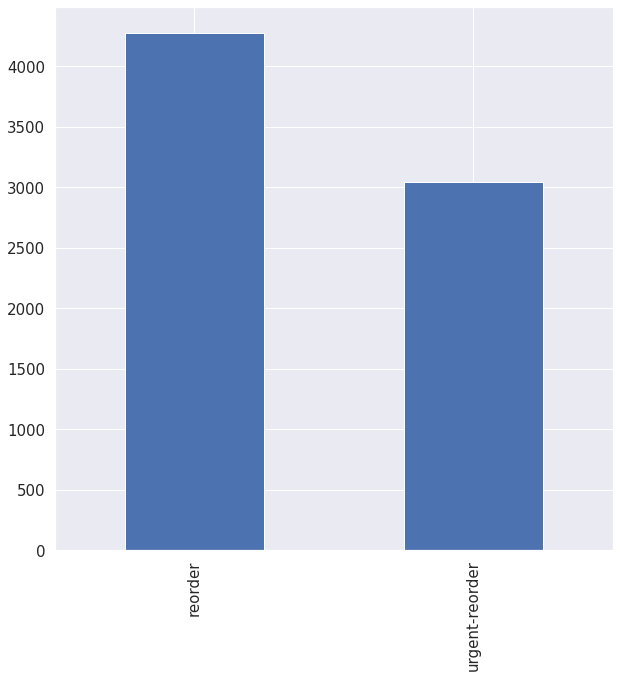

In [128]:
# how many orders and how many urgent reorders.
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})
clean_data['tag'].value_counts().plot(kind='bar',fontsize=15)

In [129]:
# remove outliers so that plots are nicer

clean_data = clean_data[clean_data.click_post_count < clean_data.click_post_count.quantile(.85)]

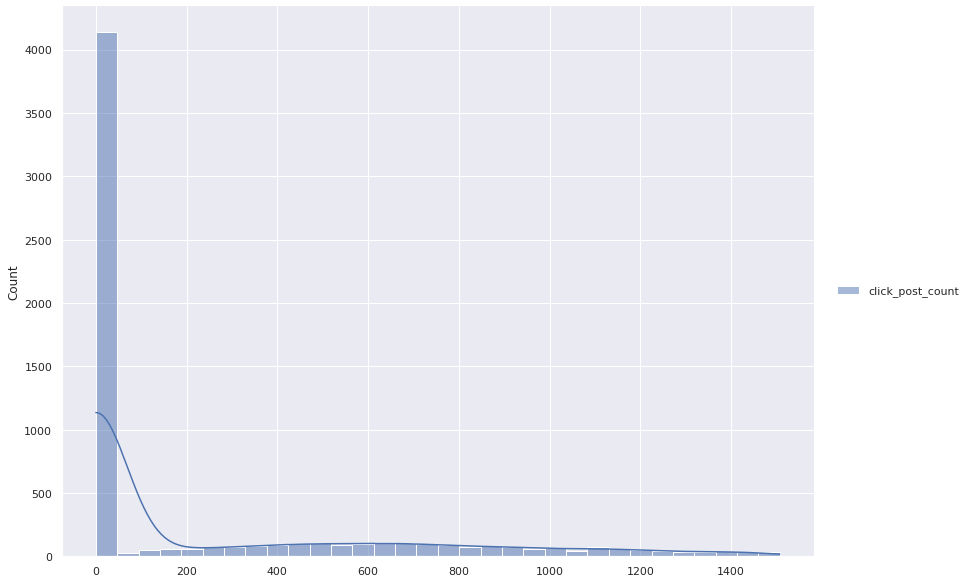

In [130]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.displot(clean_data, kde=True, height=8.27, aspect=11.7/8.27)


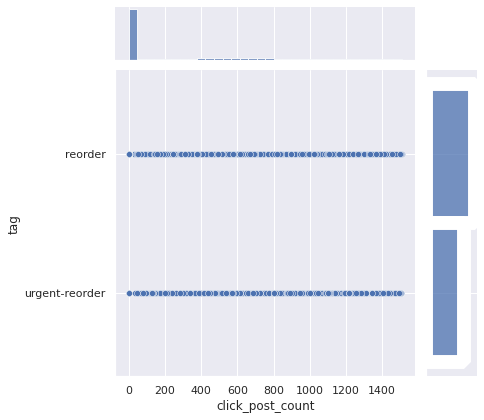

In [131]:
sns.jointplot(x='click_post_count', y='tag', data=clean_data)

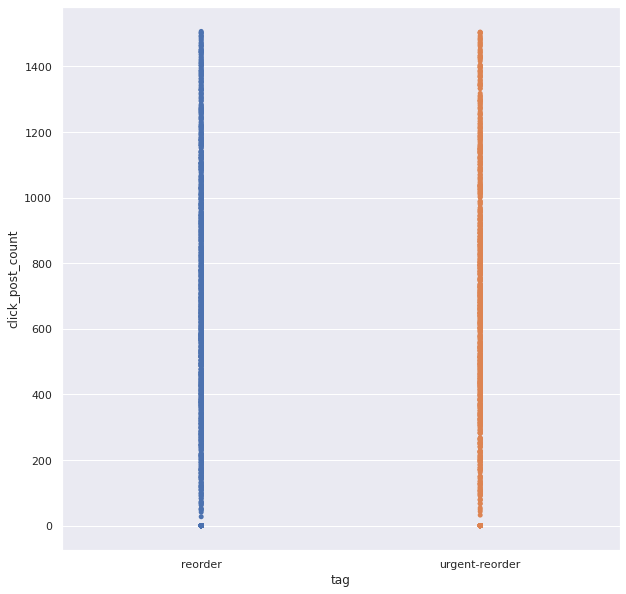

In [132]:
sns.stripplot(x="tag", y="click_post_count", data=clean_data, jitter=False)

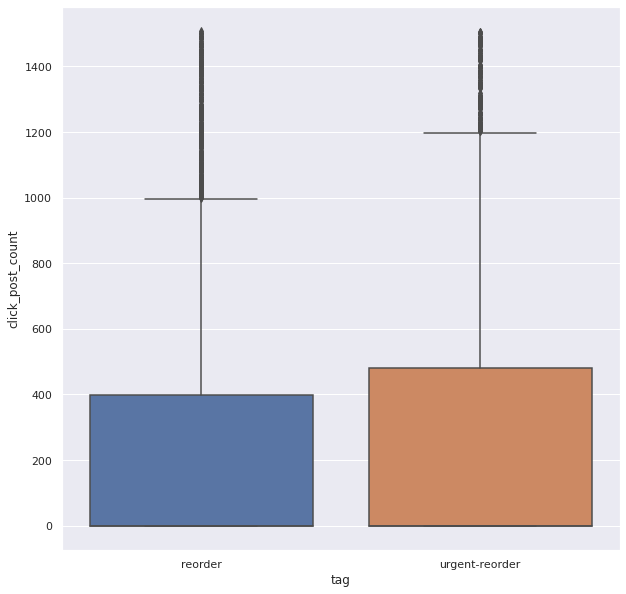

In [133]:
sns.boxplot(x="tag", y="click_post_count", data=clean_data)

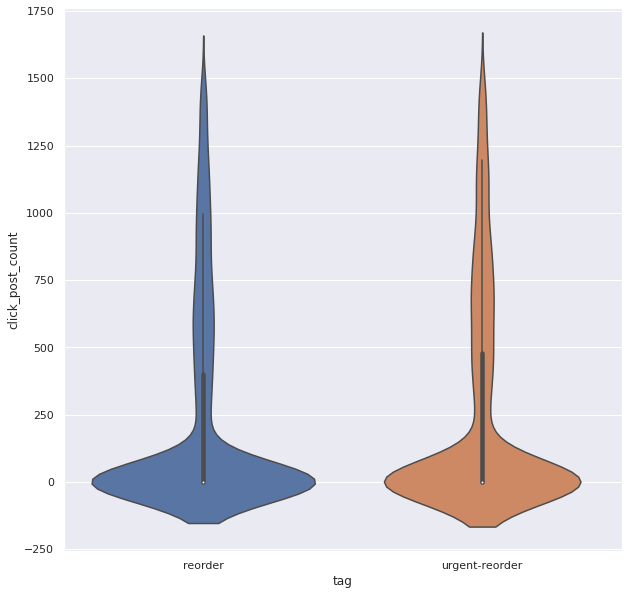

In [134]:
sns.violinplot(x="tag", y="click_post_count", data=clean_data)

In [135]:
urgent_reorder_data = clean_data[clean_data['tag']=='urgent-reorder']['click_post_count']
reorder_data = clean_data[clean_data['tag']=='reorder']['click_post_count']

In [136]:
# get the datas as seperate entities to do a ttest

urgent_reorder_data.shape, reorder_data.shape

((2711,), (3515,))

In [137]:
from scipy.stats import ttest_ind

output = ttest_ind(urgent_reorder_data, reorder_data)
output

Ttest_indResult(statistic=2.436337771675654, pvalue=0.014864674995112794)

In [138]:
np.mean(urgent_reorder_data)

253.17263002582072

In [139]:
np.mean(reorder_data)

228.54054054054055

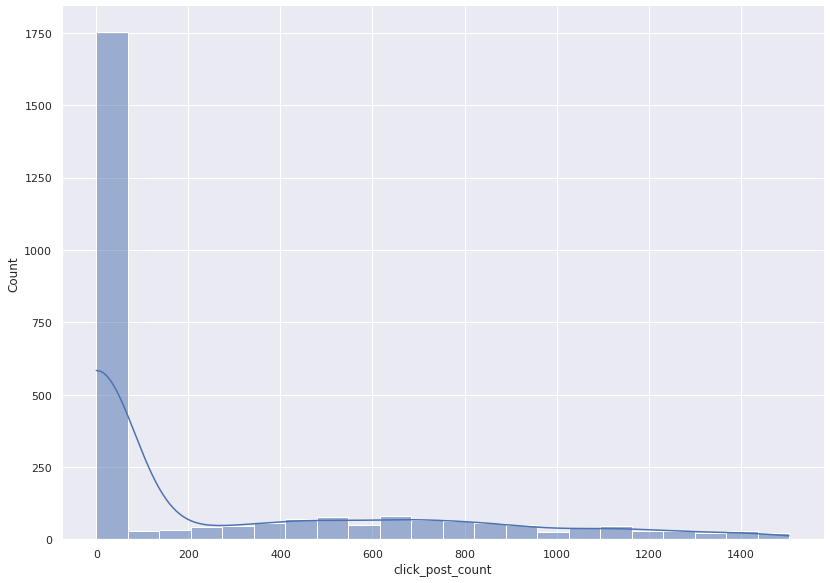

In [140]:
sns.displot(urgent_reorder_data, kde=True, height=8.27, aspect=11.7/8.27)

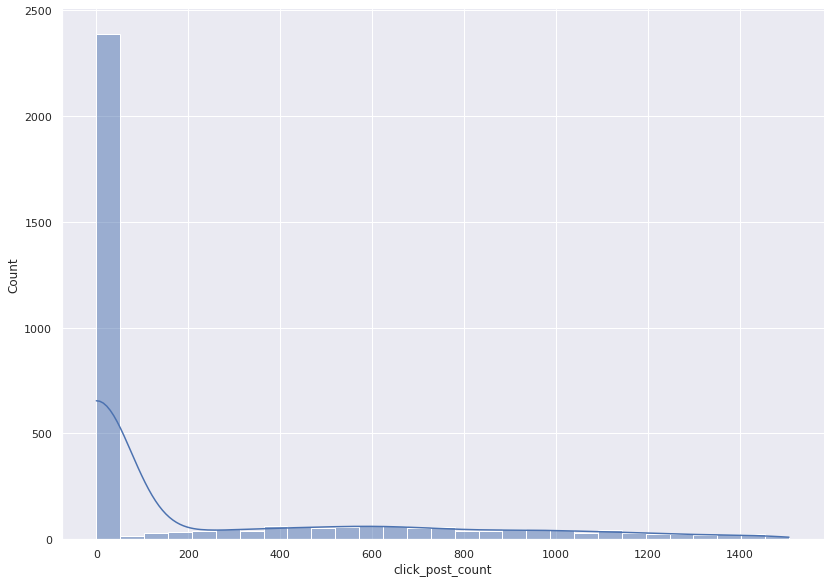

In [141]:
sns.displot(reorder_data, kde=True, height=8.27, aspect=11.7/8.27)

In [225]:
# the reorder data has a significant increase in mean.
# the end.

**Reorder Duration**

In [238]:
import pandas as pd
df = final_df
df[["reorder_time", "post_publish_time", "post_retire_time"]] = df[["reorder_time", "post_publish_time", "post_retire_time"]].apply(pd.to_datetime)
df

,index,post_id,click_time,click_post_count,tag,reorder_time,post_publish_time,post_retire_time,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,Duration,Duration_days,Duration_minutes,Duration_seconds
0,0,gXvC9ucx,5/7/2020 0:00,2031,urgent-reorder,2020-05-05 12:30:00,2020-05-04 12:53:00,2020-05-07 00:56:00,5,5,2020,12,30,0,1,19,1 days 12:26:00,1.518056,2186.0,131160.0
1,64,gXluVlHC,5/7/2020 0:00,3265,urgent-reorder,2020-05-05 02:37:00,2020-04-26 14:35:00,2020-05-13 00:10:00,5,5,2020,2,37,0,1,19,7 days 21:33:00,7.897917,11373.0,682380.0
2,294,gXxugqam,5/7/2020 0:00,1977,reorder,2020-05-08 12:41:00,2020-05-05 11:18:00,2020-05-11 12:52:00,8,5,2020,12,41,0,4,19,3 days 00:11:00,3.007639,4331.0,259860.0
3,411,gXy6Jn2Y,5/7/2020 0:00,783,reorder,2020-05-07 13:43:00,2020-05-06 16:06:00,2020-05-08 23:17:00,7,5,2020,13,43,0,3,19,1 days 09:34:00,1.398611,2014.0,120840.0
4,468,gXo2A5D9,5/7/2020 0:00,11222,reorder,2020-05-01 05:09:00,2020-04-28 15:37:00,2020-05-09 17:23:00,1,5,2020,5,9,0,4,18,8 days 12:14:00,8.509722,12254.0,735240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320,1244618,gXzC9prE,5/7/2020 18:00,0,reorder,2020-05-07 16:05:00,2020-05-07 13:48:00,2020-05-07 16:28:00,7,5,2020,16,5,0,3,19,0 days 00:23:00,0.015972,23.0,1380.0
7321,1244627,gXlypm15,5/3/2020 13:00,0,reorder,2020-05-07 10:20:00,2020-04-26 19:10:00,NaT,7,5,2020,10,20,0,3,19,NaT,NaN,NaN,NaN
7322,1244639,gXkWywKl,5/1/2020 16:00,985,reorder,2020-05-01 08:24:00,2020-04-25 16:38:00,2020-05-01 11:32:00,1,5,2020,8,24,0,4,18,0 days 03:08:00,0.130556,188.0,11280.0
7323,1244654,gXsmfEBU,5/2/2020 13:00,325,reorder,2020-05-02 11:53:00,2020-05-02 09:16:00,2020-05-02 14:28:00,2,5,2020,11,53,0,5,18,0 days 02:35:00,0.107639,155.0,9300.0


In [43]:
df['Day'] = df['reorder_time'].dt.day
# month
df['Month'] = df['reorder_time'].dt.month
# year
df['Year'] = df['reorder_time'].dt.year
# hour
df['Start_hour'] = df['reorder_time'].dt.hour
# minute
df['Start_minute'] = df['reorder_time'].dt.minute
# second
df['Start_second'] = df['reorder_time'].dt.second
# Monday is 0 and Sunday is 6
df['Start_weekday'] = df['reorder_time'].dt.weekday
# week of the year
df['Start_week_of_year'] = df['reorder_time'].dt.week
# duration
df['Duration'] = df['post_retire_time']-df['reorder_time']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [44]:
from datetime import timedelta

df['Duration_days'] = df['Duration']/timedelta(days=1)
df['Duration_minutes'] = df['Duration']/timedelta(minutes=1)
df['Duration_seconds'] = df['Duration']/timedelta(seconds=1)
df

,index,post_id,click_time,click_post_count,tag,reorder_time,post_publish_time,post_retire_time,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,Duration,Duration_days,Duration_minutes,Duration_seconds
0,0,gXvC9ucx,5/7/2020 0:00,2031,urgent-reorder,2020-05-05 12:30:00,2020-05-04 12:53:00,2020-05-07 00:56:00,5,5,2020,12,30,0,1,19,1 days 12:26:00,1.518056,2186.0,131160.0
1,64,gXluVlHC,5/7/2020 0:00,3265,urgent-reorder,2020-05-05 02:37:00,2020-04-26 14:35:00,2020-05-13 00:10:00,5,5,2020,2,37,0,1,19,7 days 21:33:00,7.897917,11373.0,682380.0
2,294,gXxugqam,5/7/2020 0:00,1977,reorder,2020-05-08 12:41:00,2020-05-05 11:18:00,2020-05-11 12:52:00,8,5,2020,12,41,0,4,19,3 days 00:11:00,3.007639,4331.0,259860.0
3,411,gXy6Jn2Y,5/7/2020 0:00,783,reorder,2020-05-07 13:43:00,2020-05-06 16:06:00,2020-05-08 23:17:00,7,5,2020,13,43,0,3,19,1 days 09:34:00,1.398611,2014.0,120840.0
4,468,gXo2A5D9,5/7/2020 0:00,11222,reorder,2020-05-01 05:09:00,2020-04-28 15:37:00,2020-05-09 17:23:00,1,5,2020,5,9,0,4,18,8 days 12:14:00,8.509722,12254.0,735240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320,1244618,gXzC9prE,5/7/2020 18:00,838,reorder,2020-05-07 16:05:00,2020-05-07 13:48:00,2020-05-07 16:28:00,7,5,2020,16,5,0,3,19,0 days 00:23:00,0.015972,23.0,1380.0
7321,1244627,gXlypm15,5/3/2020 13:00,0,reorder,2020-05-07 10:20:00,2020-04-26 19:10:00,NaT,7,5,2020,10,20,0,3,19,NaT,NaN,NaN,NaN
7322,1244639,gXkWywKl,5/1/2020 16:00,985,reorder,2020-05-01 08:24:00,2020-04-25 16:38:00,2020-05-01 11:32:00,1,5,2020,8,24,0,4,18,0 days 03:08:00,0.130556,188.0,11280.0
7323,1244654,gXsmfEBU,5/2/2020 13:00,325,reorder,2020-05-02 11:53:00,2020-05-02 09:16:00,2020-05-02 14:28:00,2,5,2020,11,53,0,5,18,0 days 02:35:00,0.107639,155.0,9300.0


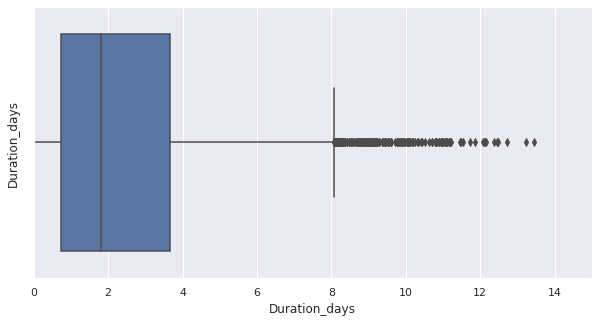

In [58]:

plt.figure(figsize=(10,5))
plt.xlim(0,15)
plt.ylabel('Duration_days')
sns.boxplot(x=df1['Duration_days'])
plt.show()


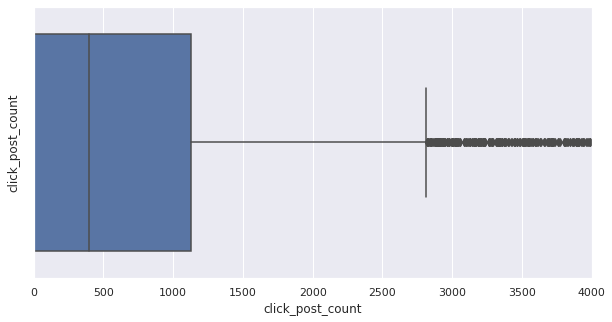

In [62]:

plt.figure(figsize=(10,5))
plt.xlim(0,4000)
plt.ylabel('click_post_count')
sns.boxplot(x=df1['click_post_count'])
plt.show()


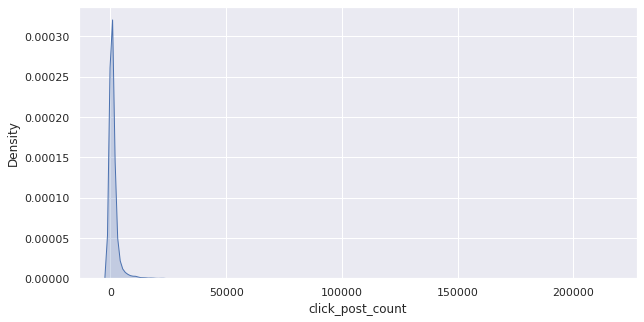

In [65]:

plt.figure(figsize=(10,5))
sns.kdeplot(df1['click_post_count'],shade=True)
plt.show()


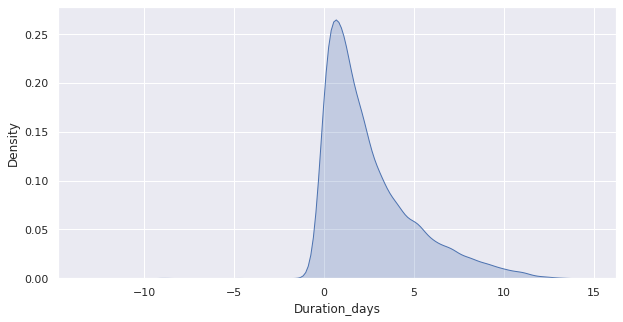

In [66]:

plt.figure(figsize=(10,5))
sns.kdeplot(df1['Duration_days'],shade=True)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


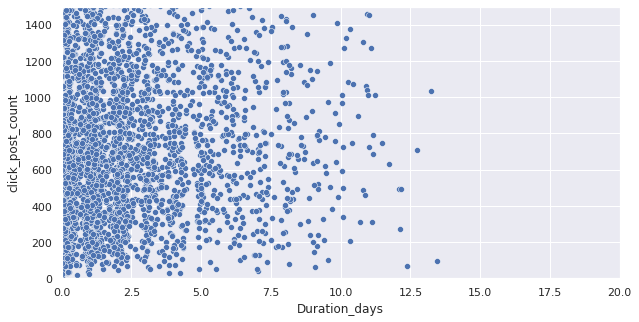

In [85]:
plt.figure(figsize=(10,5))
sns.scatterplot(df1['Duration_days'],df1['click_post_count'])
plt.xlim(0,20)
plt.ylim(0,1500)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


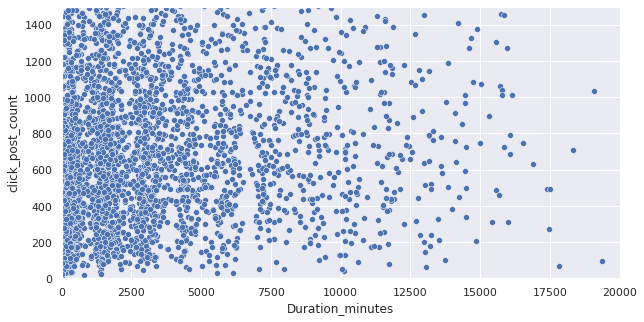

In [86]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Duration_minutes'],df1['click_post_count'])
plt.xlim(0,20000)
plt.ylim(0,1500)
plt.show()
